In [5]:
import pandas as pd  #import all libraries
import matplotlib.pyplot as plt 
import ast
df = pd.read_csv("/Users/jastisarika/Downloads/data_jobs.csv")  #load the csv file
#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


Import and install Seaborn   ctrl+tilda to run the terminal 

In [6]:
import seaborn as sns

In [7]:
#get the data analyst jobs from usa 
df_da_usa = df[(df["job_title_short"]=='Data Analyst') & (df["job_country"]=='United States')].copy()

#drop nan values from th column for plotting 
df_da_usa = df_da_usa.dropna(subset=["salary_year_avg"])

In [8]:
df_da_usa = df_da_usa.explode('job_skills')
df_da_usa_group = df_da_usa.groupby('job_skills')["salary_year_avg"].agg(['count','median']) 
 # count of the cskills and median of the sallaries\
df_da_top_pay = df_da_usa_group.sort_values(by='median', ascending = False).head(10)  #we get top 10 skills based on median salary 
df_da_top_pay 
df_da_skils =df_da_usa_group.sort_values(by="count",ascending=False).head(10).sort_values(by='median', ascending = False) #here forst we have to sort by count and then we have to sort by median   #top 10 skills with higest count and their associate salary 
df_da_skils 

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


/var/folders/hl/02cmh7nn2wnf3q30t5d75cdr0000gn/T/ipykernel_93476/9740161.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


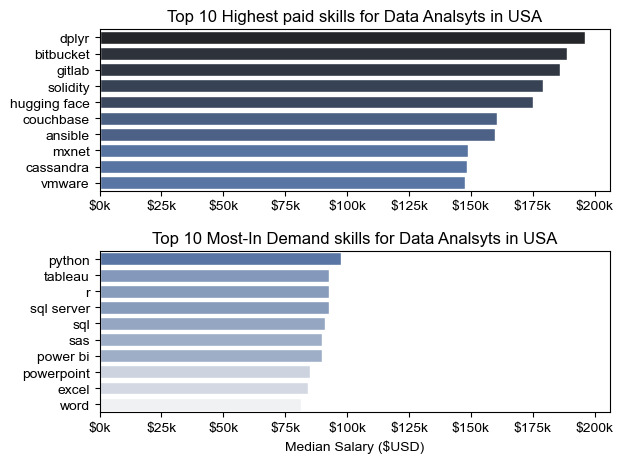

In [15]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
# df_da_top_pay.plot(kind='barh',y='median',ax = ax[0],legend = False)
# ax[0].invert_yaxis()   #sort in correct order 
sns.barplot(data =df_da_top_pay,x='median',y=df_da_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r' )
ax[0].set_title('Top 10 Highest paid skills for Data Analsyts in USA')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# df_da_skils.plot(kind='barh',y='median',ax = ax[1], legend = False)
# ax[1].invert_yaxis()
sns.barplot(data =df_da_skils,x='median',y=df_da_skils.index,ax=ax[1],hue='median',palette='light:b' )
ax[1].set_xlim(ax[0].get_xlim())     #set limit of ax[1] whatever is with ax[0]
ax[1].set_title('Top 10 Most-In Demand skills for Data Analsyts in USA')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

fig.tight_layout()
fig.show()